In [27]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

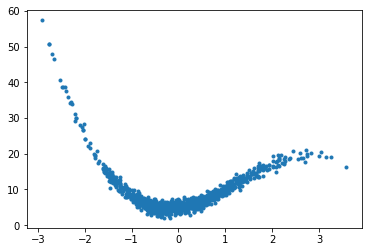

In [160]:
N = 3
M = 1000
X = np.random.randn(M,1)
y = 5 + 2*X + 4*X**2 - X**3 + np.random.randn(M,1)
plt.plot(X,y, '.')

# X_b = np.c_[np.ones((M,1)), X] # add x0 = 1 for all examples
poly_features = PolynomialFeatures(degree=N, include_bias=True)
X_b = poly_features.fit_transform(X)

In [161]:
## Least squares implementation
theta_ls = la.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_ls)

[[ 5.00527762]
 [ 1.96960084]
 [ 3.99642655]
 [-1.00015782]]


In [162]:
## Gradient descent
eta = 0.01
theta_gd = np.random.randn(N+1,1)
for i in range(1000):
    dMSE = 2/M * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd -= eta * dMSE
print(theta_gd)

[[ 5.00534264]
 [ 1.9688849 ]
 [ 3.99636511]
 [-1.00001842]]


In [163]:
## Stochastic gradient descent
batch_size = 10
n_epochs = 500
t0, t1 = 0.1, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta_sgd = np.random.randn(N+1,1)
for epoch in range(n_epochs):
    for i in range(M // batch_size):
        j = np.random.randint(M)
        xj = X_b[j:min(j+batch_size, M - 1)]
        yj = y[j:min(j+batch_size, M - 1)]
        dMSE = 2 * xj.T.dot(xj.dot(theta_sgd) - yj)
        eta = learning_schedule(epoch * M + i)
        theta_sgd -= eta * dMSE
print(theta_sgd)

[[ 4.9233745 ]
 [ 1.09494505]
 [ 3.98419688]
 [-0.83535398]]


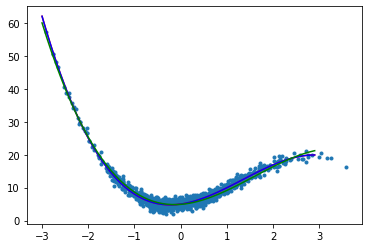

In [164]:
X_reg = np.array([[0.1 * i] for i in range(-30,30)])
X_reg_poly = poly_features.fit_transform(X_reg)

y_ls  = X_reg_poly.dot(theta_ls)
y_gd  = X_reg_poly.dot(theta_gd)
y_sgd = X_reg_poly.dot(theta_sgd)

plt.plot(X,y, '.')
plt.plot(X_reg, y_ls, 'red')
plt.plot(X_reg, y_gd, 'blue')
plt.plot(X_reg, y_sgd, 'green')
plt.show()